See <a href="https://huggingface.co/datasets">Huggingface Datasets</a>

In [27]:
import datasets
from   datasets import list_datasets, load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn.functional as F

In [2]:
datasets = list_datasets()
print(f'There are {len(datasets)} datsets available, including')
for i in range(10):
    print(f'  - {datasets[i]}')

There are 2229 datsets available, including
  - 0n1xus/codexglue
  - 0n1xus/pytorrent-standalone
  - AConsApart/anime_subtitles_DialoGPT
  - AI-Sweden/SuperLim
  - AI-Sweden/super_glue_sv
  - AI-it/korean-hate-speech
  - ARKseal/YFCC14M_subset_webdataset
  - ARTeLab/fanpage
  - ARTeLab/ilpost
  - ARTeLab/mlsum-it


In [3]:
metadata = list_datasets(with_details=True)[datasets.index('emotion')]
print(metadata.description)
print()
print('\n'.join(metadata.citation.split('\n')[:8]))

Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. For more detailed information please refer to the paper.

@inproceedings{saravia-etal-2018-carer,
    title = "{CARER}: Contextualized Affect Representations for Emotion Recognition",
    author = "Saravia, Elvis  and
      Liu, Hsien-Chi Toby  and
      Huang, Yen-Hao  and
      Wu, Junlin  and
      Chen, Yi-Shin",
    booktitle = "Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing",


In [4]:
emotions = load_dataset('emotion')
emotions

Using custom data configuration default
Reusing dataset emotion (/Users/damiansp/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [6]:
len(train_ds)

16000

In [7]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [8]:
train_ds.column_names

['text', 'label']

In [9]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}

In [10]:
train_ds[1:6]

{'text': ['i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was'],
 'label': [0, 3, 2, 3, 0]}

In [11]:
emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [12]:
def label_int2str(i):
    return emotions['train'].features['label'].int2str(i)

In [13]:
df['label_name'] = df.label.apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


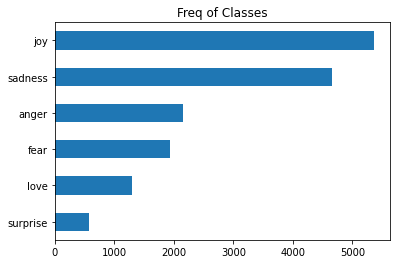

In [14]:
df.label_name.value_counts(ascending=True).plot.barh()
plt.title('Freq of Classes');

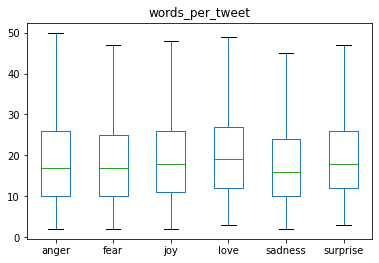

In [17]:
df['words_per_tweet'] = df.text.str.split().apply(len)
df.boxplot(
    'words_per_tweet', by='label_name', showfliers=False, grid=False)
plt.suptitle('')
plt.xlabel('');

In [18]:
emotions.reset_format()

## From Text to Tokens
### Character Tokenization

In [22]:
text = 'Tokenizing text is a core task of NLP.'
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [23]:
token2idx = {ch: idx 
             for idx, ch in enumerate(sorted(set(tokenized_text)))}
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [24]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [25]:
categorical_df = pd.DataFrame({
    'name': ['Bumblebee', 'Optimus Prime', 'Megatron'],
    'label': [0, 1, 2]})
categorical_df

,name,label
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [26]:
pd.get_dummies(categorical_df.name)

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [28]:
input_ids = torch.tensor(input_ids)
one_hot = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot.shape

torch.Size([38, 20])

In [29]:
print(f'Token: {tokenized_text[0]}')
print(f'Index: {input_ids[0]}')
print(f'One-Hot: {one_hot[0]}')

Token: T
Index: 5
One-Hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Word Tokenization

In [30]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']
